# Grid hyperparameter search

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1zTkYmzlxC519_7jKPreSyrdp8H_S_f8x)
[![ArXiv](http://img.shields.io/badge/cs.LG-arXiv%3A2010.07842-B31B1B.svg)](https://arxiv.org/abs/2010.07842)

**↑ Click on "Open in Colab" to execute this notebook live on Google Colaboratory.**

## Getting Started

First, we need to mount the Google Drive so we can access the Distributed Acoustic Sensing data stored in it. After execution, the following script will provide a link. Open the link and follow the instructions to get the one-time password. If you have several Google accounts logged on your computer, make sure you use the one the DAS data were shared with.

Some of the data used in this work are proprietary data and may be shared under specific circumstances. Please contact the corresponding author, [Vincent Dumont](mailto:vincentdumont11@gmail.com) if you would like to request access to the data or have any questions regarding this project.

Upon authorization to share the data, a link to a shared Google Drive folder will be send to you. After clicking on the link, the shared folder (called ``DAS_data``) will be listed under the ``Shared with me`` section of your Google Drive, you can then do a right click on that folder and click ``Add shortcut to Drive``, this will add the folder to your ``My Drive`` repository.

Finally, executing the following cell will mount your Google Drive to this instance of Google Colab and give you access to the data:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/DAS_data/'

In [3]:
%%capture
!git clone https://gitlab.com/ml4science/mldas
!pip install -r mldas/requirements.txt
!ln -s /content/mldas/mldas $(python -c "import pip; print(pip.__path__[0].rstrip('/pip'))")/

In [6]:
%%capture
!tar -zxvf /content/drive/MyDrive/DAS_data/all_jobs.tar.gz

## Fig. 1: Parallel plot

7314 jobs in total.
Processing column 1 out of 9
Processing column 2 out of 9
Processing column 3 out of 9
Processing column 4 out of 9
Processing column 5 out of 9
Processing column 6 out of 9
Processing column 7 out of 9
Processing column 8 out of 9
Processing column 9 out of 9


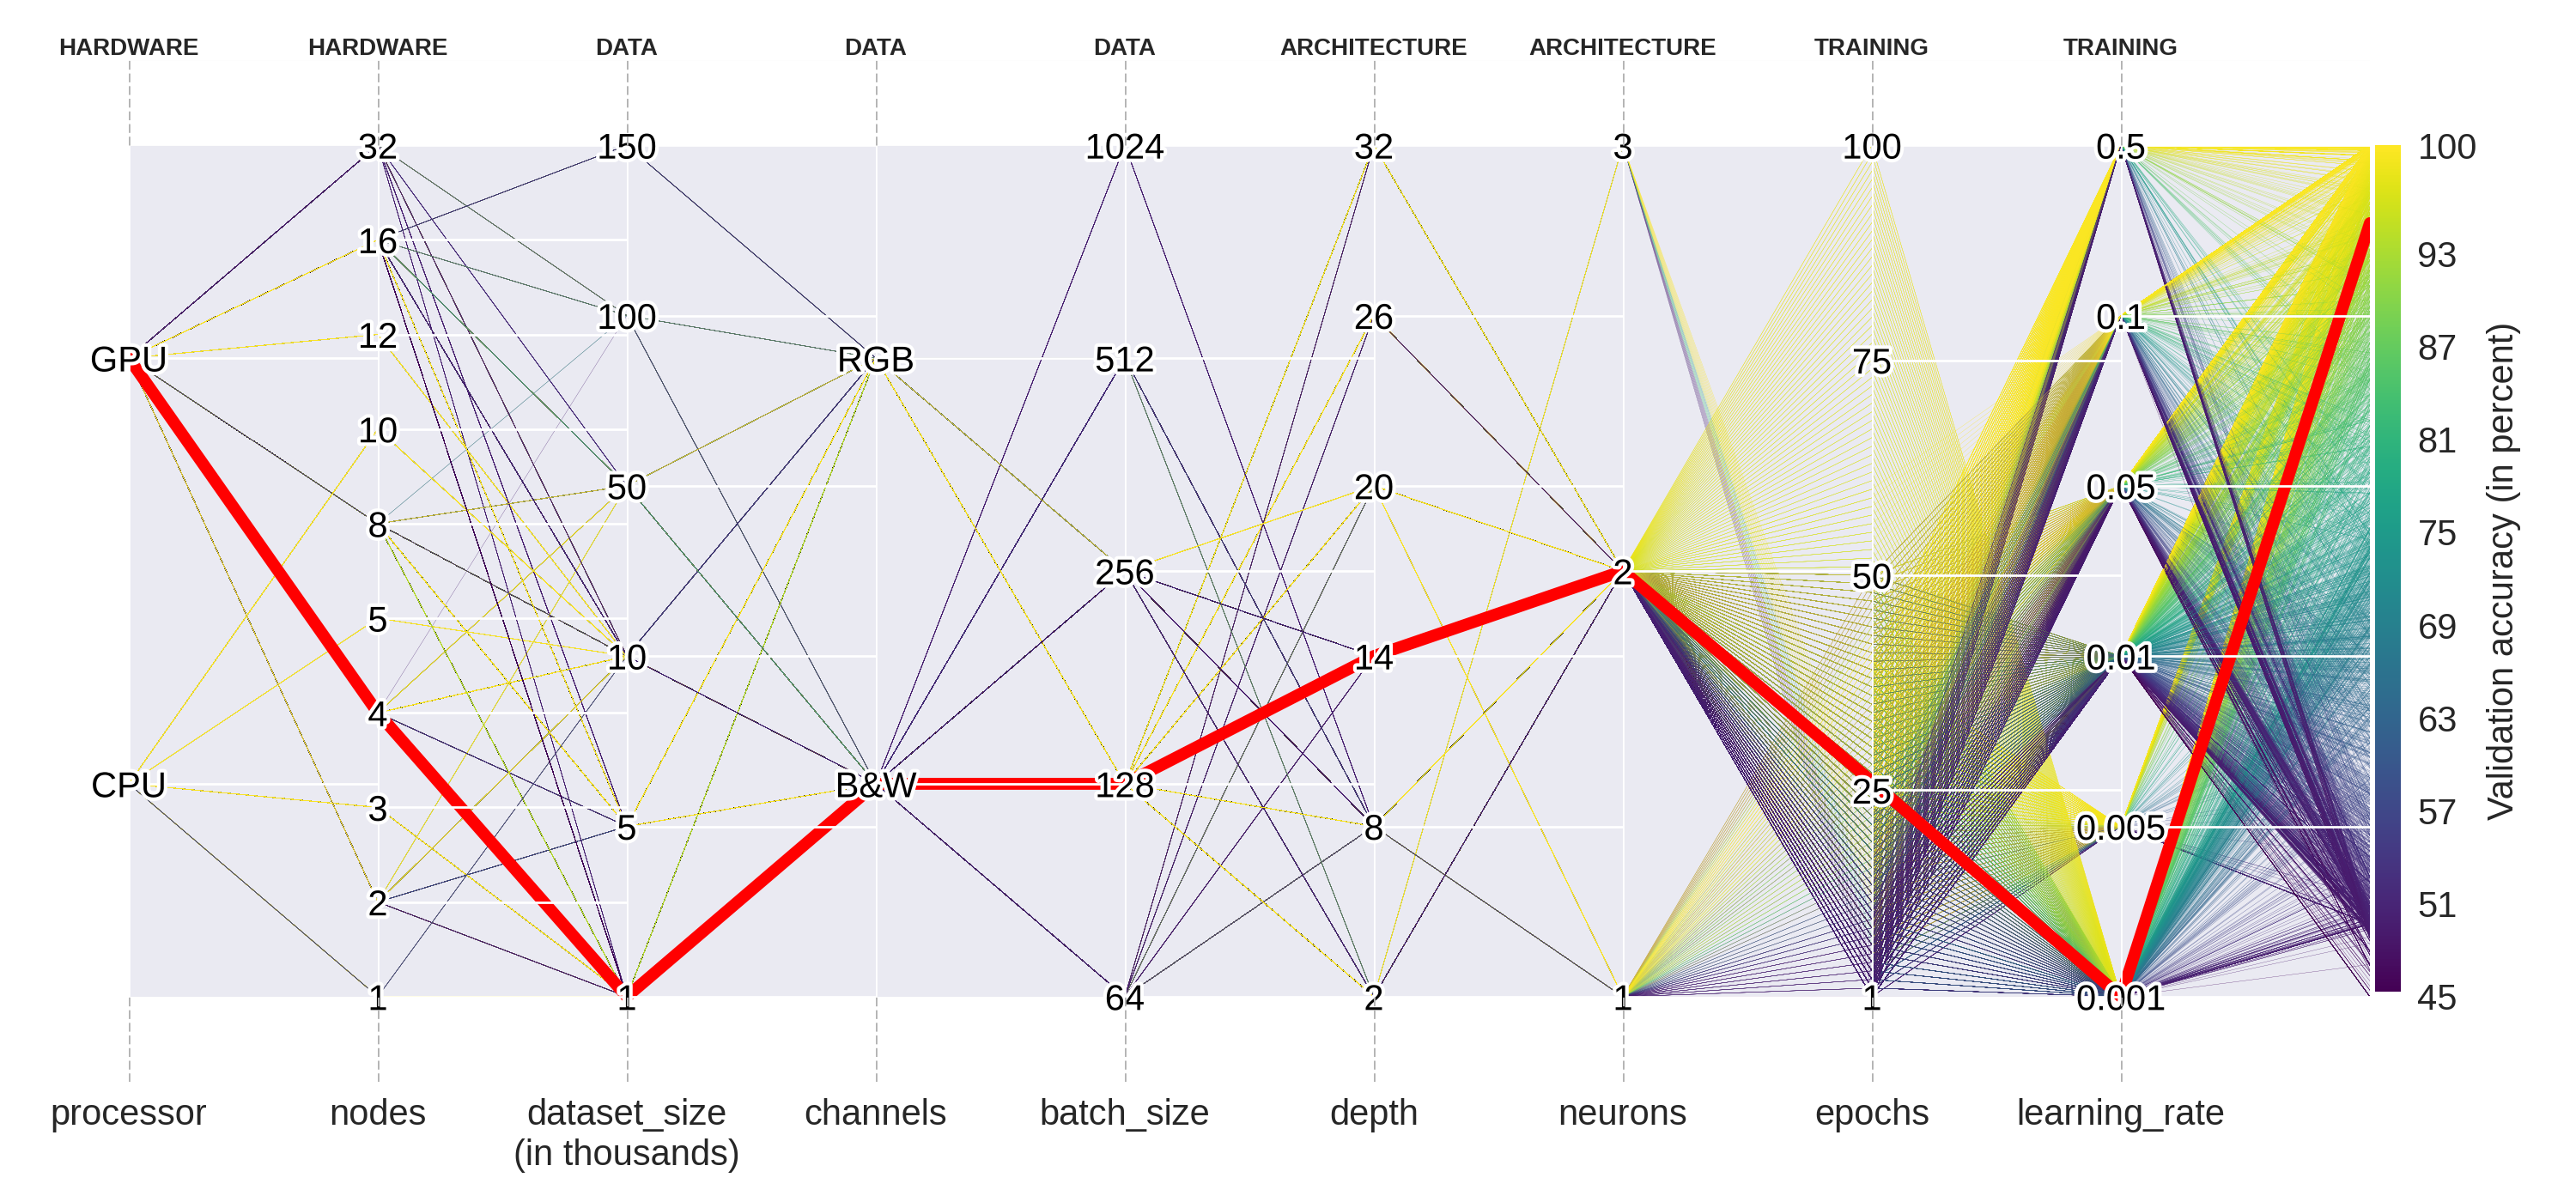

In [7]:
from IPython.display import Image
!./mldas/bin/das_parallel.py -r all_jobs/ -ec -p 0.1
Image('parallel_coordinates.png')

## Fig. 2: GPU scaling

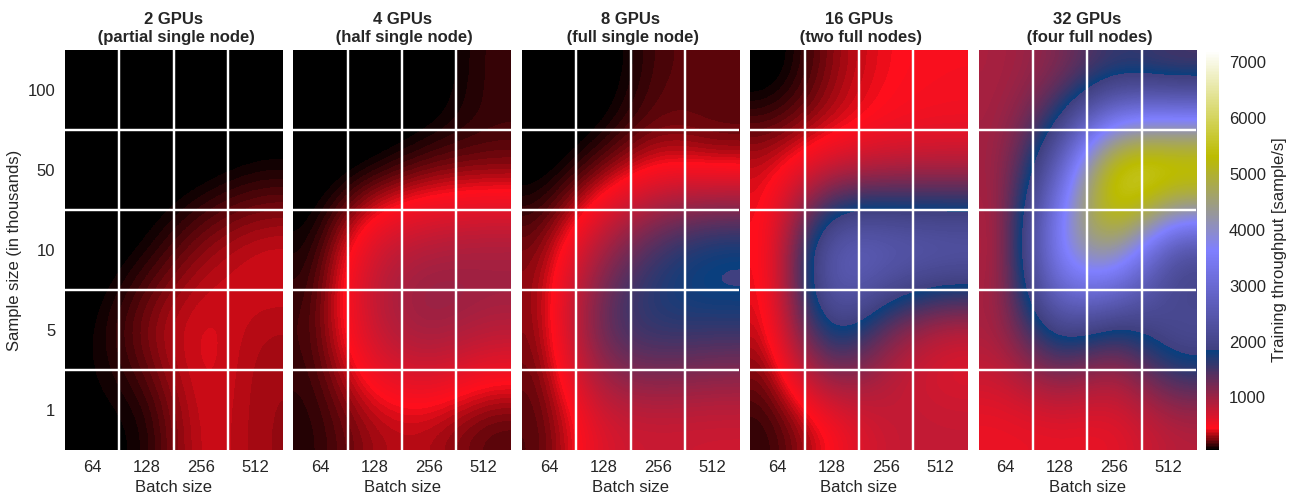

In [8]:
from IPython.display import Image
!./mldas/bin/das_scaletune.py scaling -iu -t 'all_jobs/multiclass/2-neuron/1-channel/gpu-n*-ds*-bs*-ep1-dp8-lr0.01'
Image('scaling.png')

## Fig. 3: Probability per model

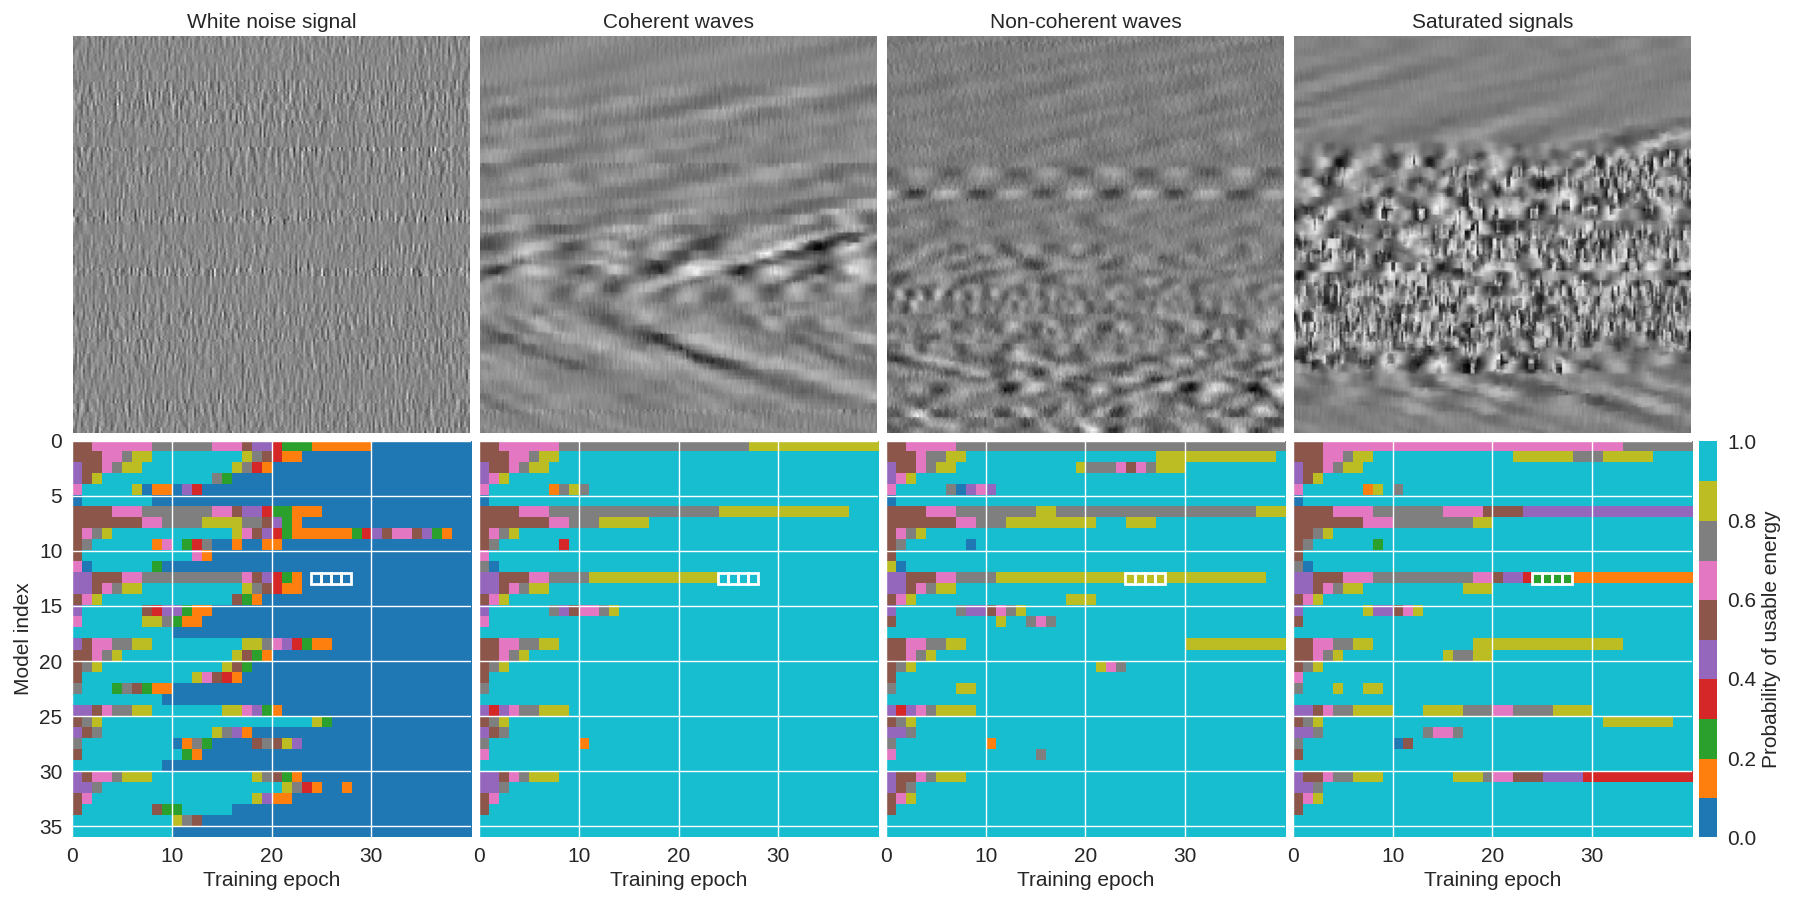

In [10]:
from IPython.display import Image
!./mldas/bin/das_scaletune.py assess -t /content/drive/MyDrive/DAS_data/record_ds1.txt -d /content/drive/MyDrive/DAS_data
Image('plot.png')